In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
import scipy.stats as stats

In [2]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical
df5_numeric

{'M', 'F'}
{'Palestine', 'Syria', 'venzuela', 'SaudiArabia', 'Lybia', 'Morocco', 'lebanon', 'Egypt', 'Iran', 'USA', 'Tunis', 'Iraq', 'KW', 'Jordan'}
{'Palestine', 'Syria', 'venzuela', 'SaudiArabia', 'Lybia', 'KuwaIT', 'Morocco', 'lebanon', 'Egypt', 'Iran', 'USA', 'Tunis', 'Iraq', 'Jordan'}
{'HighSchool', 'MiddleSchool', 'lowerlevel'}
{'G-04', 'G-07', 'G-08', 'G-05', 'G-09', 'G-11', 'G-10', 'G-06', 'G-02', 'G-12'}
{'A', 'B', 'C'}
{'Spanish', 'Quran', 'English', 'Arabic', 'French', 'Biology', 'IT', 'Geology', 'History', 'Chemistry', 'Science', 'Math'}
{'F', 'S'}
{'Father', 'Mum'}
{'No', 'Yes'}
{'Bad', 'Good'}
{'Under-7', 'Above-7'}
{'M', 'H', 'L'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,12,5,2,0,0,6,0,0,15,16,2,20,1,1,0,0
1,0,12,5,2,0,0,6,0,0,20,20,3,25,1,1,0,0
2,0,12,5,2,0,0,6,0,0,10,7,0,30,0,0,1,2
3,0,12,5,2,0,0,6,0,0,30,25,5,35,0,0,1,2
4,0,12,5,2,0,0,6,0,0,40,50,12,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,13,13,1,2,0,9,1,0,5,4,5,8,0,0,1,2
476,1,13,13,1,2,0,7,0,0,50,77,14,28,0,0,0,0
477,1,13,13,1,2,0,7,1,0,55,74,25,29,0,0,0,0
478,1,13,13,1,2,0,8,0,0,30,17,14,57,0,0,1,2


In [74]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,11,5,2,2,2,4,0,1,0,0,1,2
1,0,11,5,2,2,2,4,0,1,0,0,1,2
2,0,11,5,2,2,2,4,0,1,1,1,0,0
3,0,11,5,2,2,2,4,0,1,1,1,0,0
4,0,11,5,2,2,2,4,0,1,1,1,0,2


In [ ]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr(method="spearman"))
plt.title('Spearman Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr(method="spearman"))
plt.title('Spearman Correlation')
plt.show()


In [ ]:
# plot histogram of numeric data
data_numeric.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
data_numeric.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

### Observations:
- The distribution of the data is not normal, so we cannot use parametric tests.

In [ ]:
## Perform Hypothesis Testing
from scipy import stats
import numpy as np

## 1. Is there a significant difference in the average grade of students who are absent and those who are present?
## H0: There is no significant difference in the average grade of students who are absent and those who are present.
## H1: There is a significant difference in the average grade of students who are absent and those who are present.

# run t-test
stats.ttest_ind(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

# run ANOVA
stats.f_oneway(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

## Chi-Square test for categorical variables
```https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7```

In [ ]:
df = pd.read_csv("xAPI-Edu-Data.csv")

df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])

df_cat = df[cat_var]
cat_var

In [ ]:
from itertools import product
import scipy.stats as ss

In [ ]:
cat_var1 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var2 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))


In [ ]:
result

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

### Categorical variables correlation

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features


In [ ]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

In [ ]:
## Categorical variables only

selected_column= df[categorical_features]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

### Basic data analysis

In [ ]:
data.describe()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Analyzing the Raised hands column.', fontsize=20)# Math score PDF
sns.kdeplot(x='raisedhands', data=data, ax=ax1)
ax1.title.set_text('PDF')# Math score CDF
sns.ecdfplot(x='raisedhands', data=data, ax=ax2)
ax2.title.set_text('CDF')# Math score QQ Plot
qq_plot = stats.probplot(x=data['raisedhands'], plot=plt)
ax3.title.set_text('QQ Plot')



### Mann-Whitney U Test
This is for the relation and student gender columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

le = LabelEncoder()
df = pd.read_csv("xAPI-Edu-Data.csv")

label1 = le.fit_transform(df["gender"])
label2 = le.fit_transform(df["Relation"])

df.drop("gender", axis=1, inplace=True)
df.drop("Relation", axis=1, inplace=True)

df["gender"] = label1
df["Relation"] = label2

data1 = df.query("gender==0")['Relation']
data2 = df.query("gender==1")['Relation']
data1


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Histogram")

ax1.hist(data1, histtype='bar')
ax2.hist(data2, histtype='bar')
plt.show()

Performing two-sided Mann-Whitney U test

In [ ]:
stats.mannwhitneyu(x=data1, y=data2, alternative='two-sided')

We see that p<0.05 and U is high thus it is significant and thus the yield between two groups is significantly different.

Performing one-sided Mann-Whitney U test

In [ ]:
stats.mannwhitneyu(x=data1, y=data2, alternative='greater')

We see that p<0.05 and U is high thus it is significant and thus the median for the first group is greater (has more 1s).

## Pairwise Wlicoxon Signed Rank test on all categorical variables

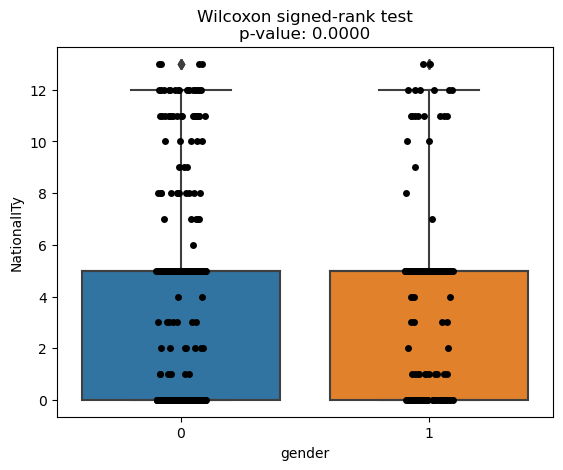

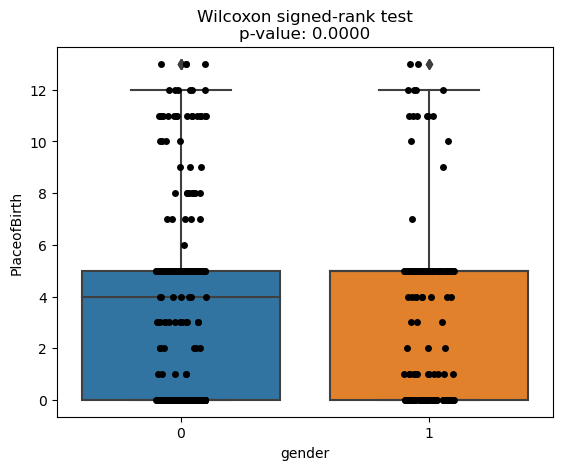

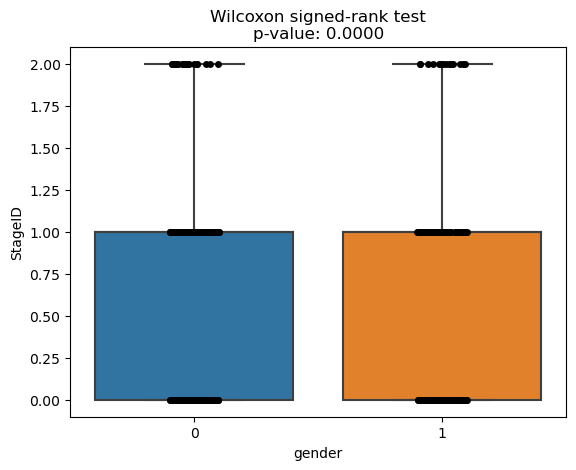

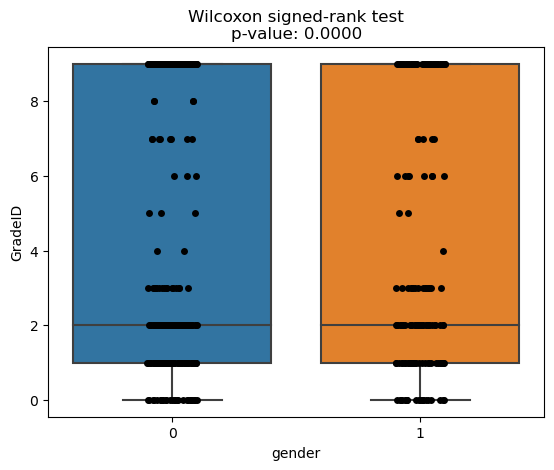

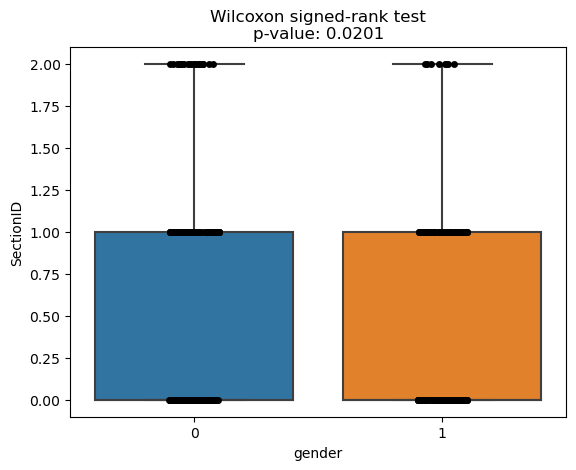

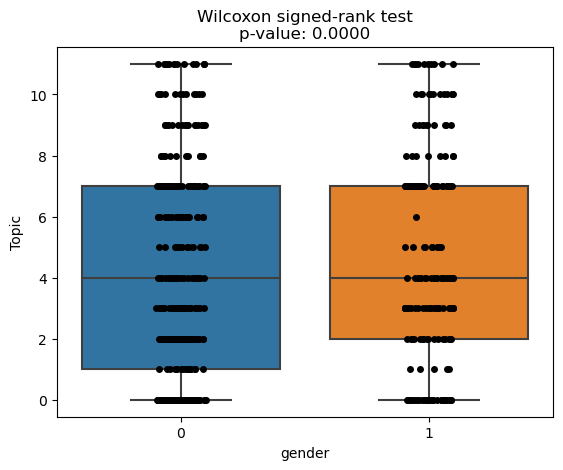

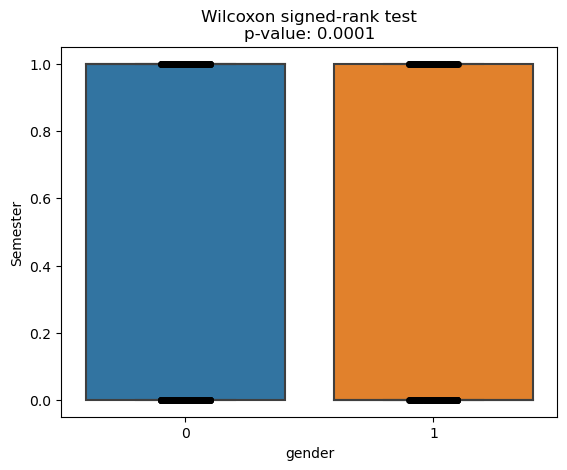

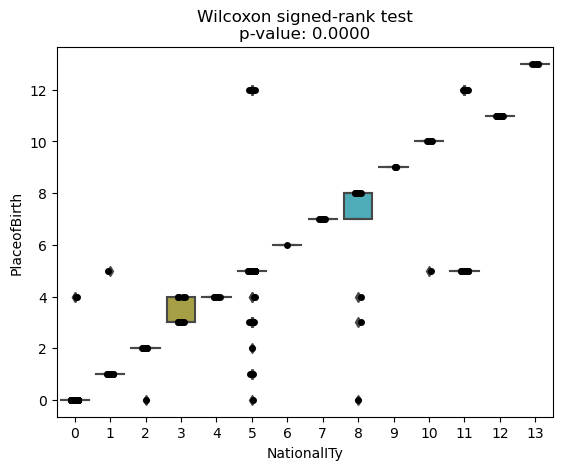

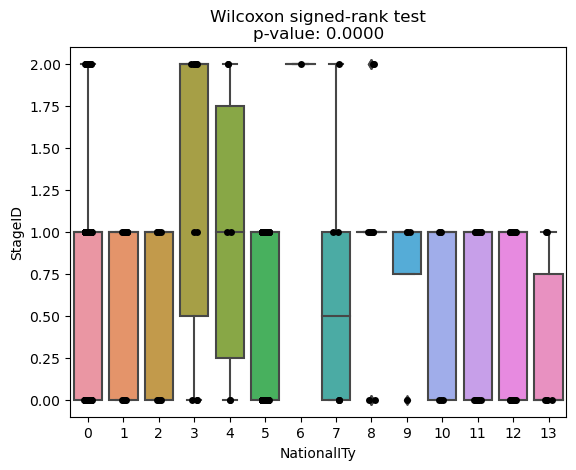

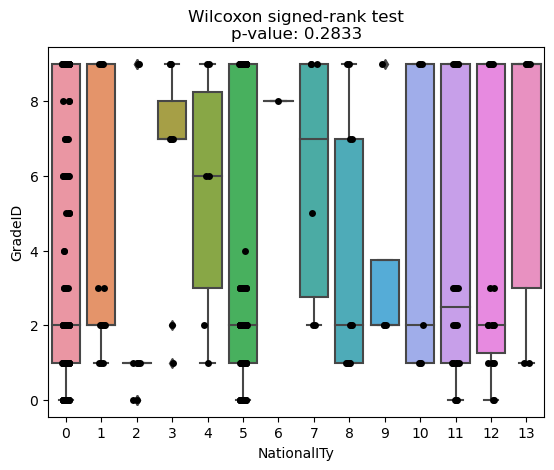

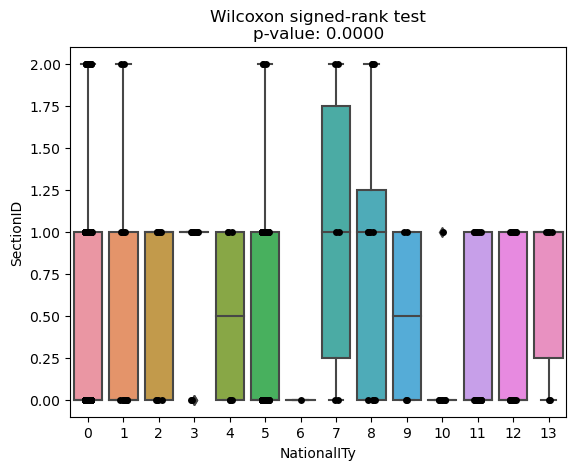

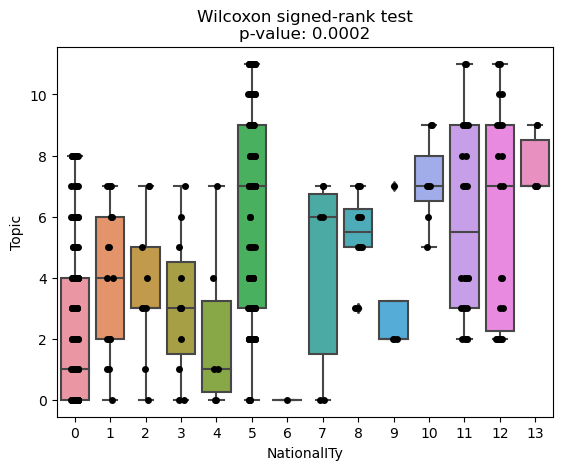

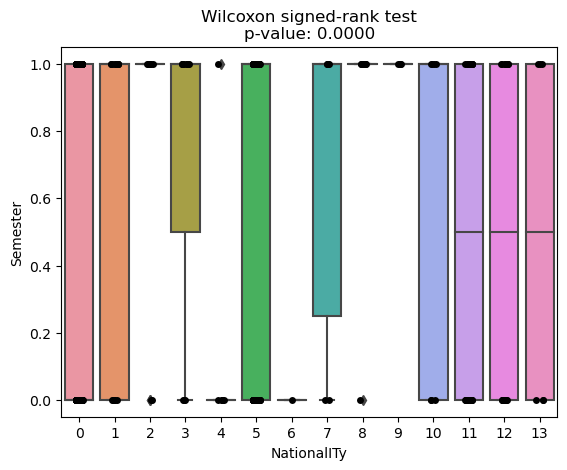

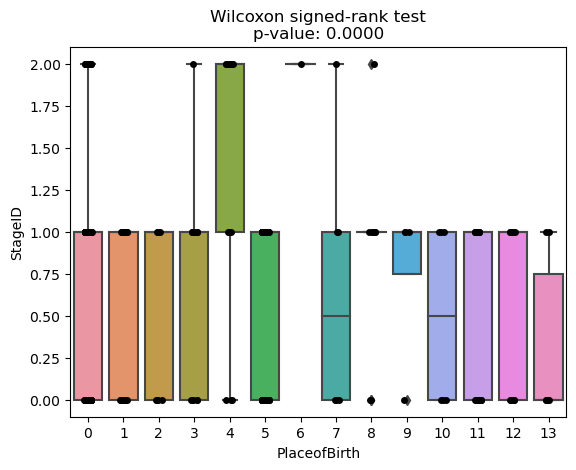

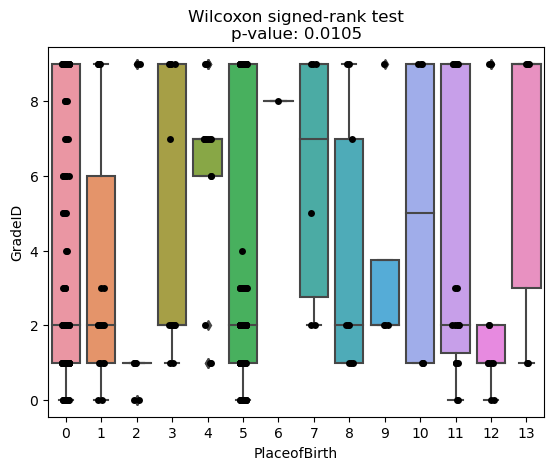

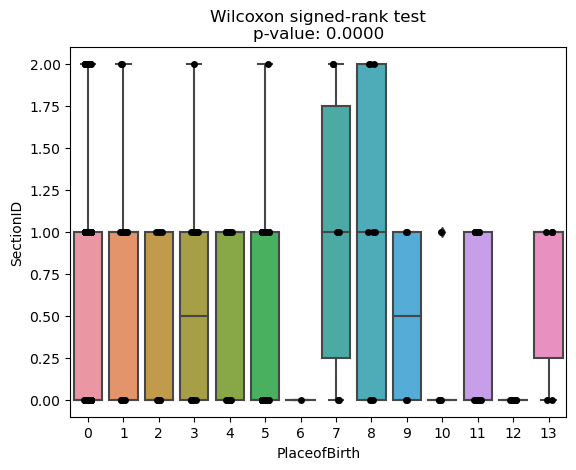

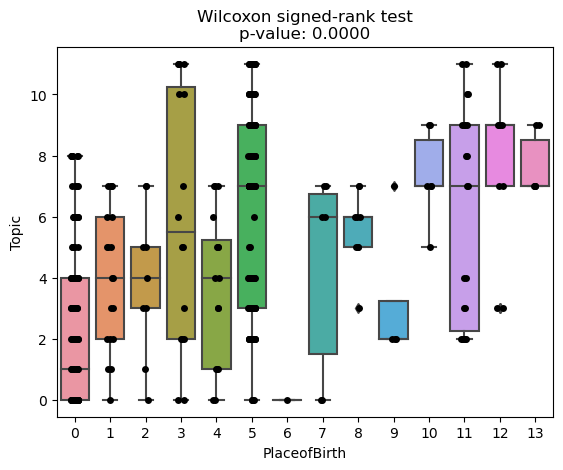

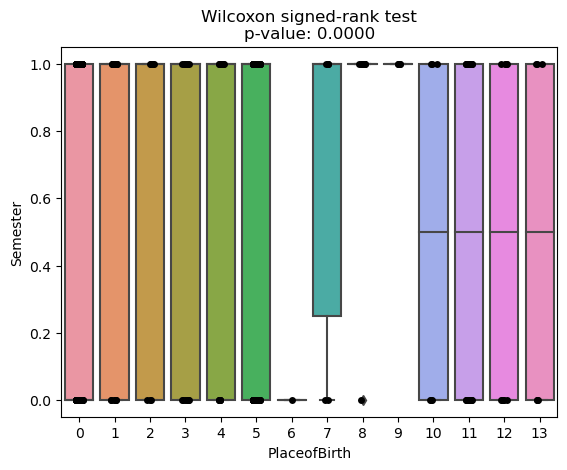

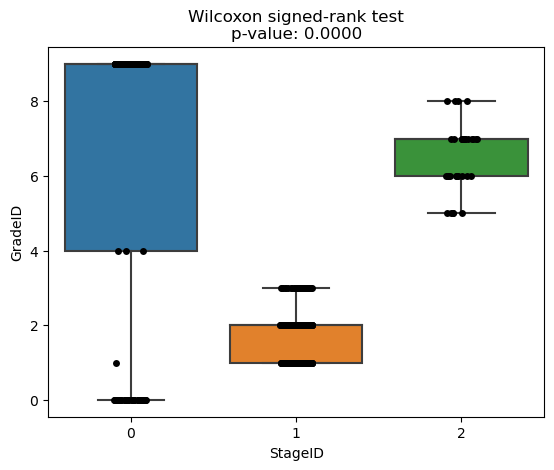

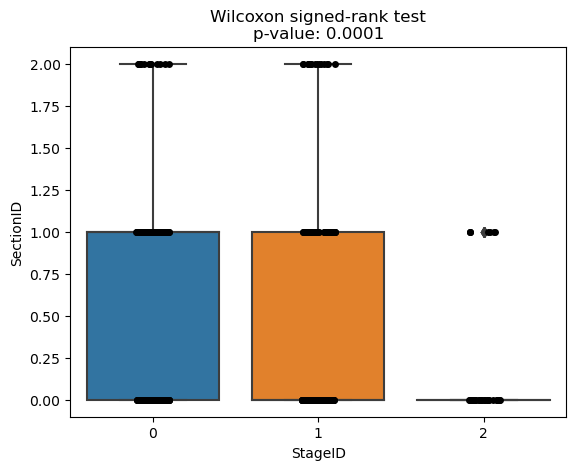

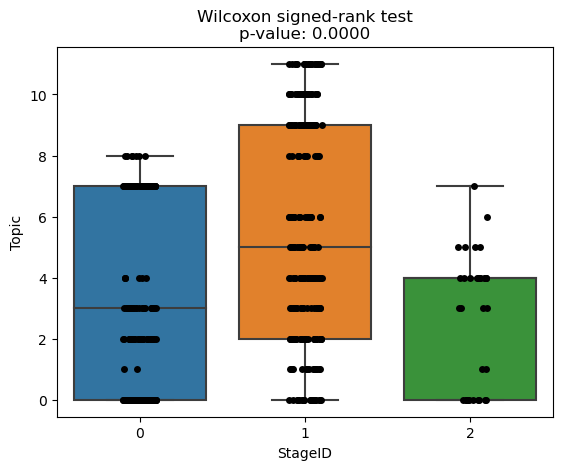

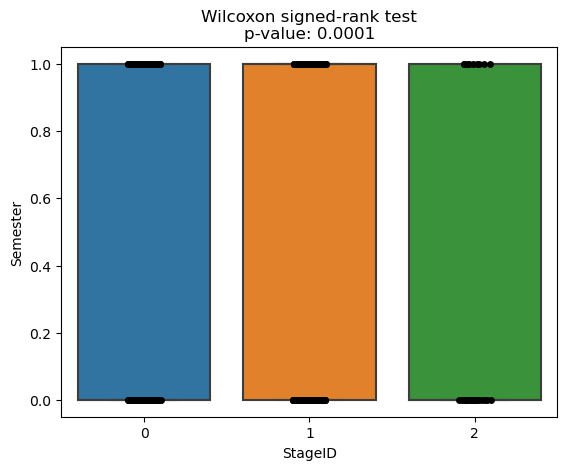

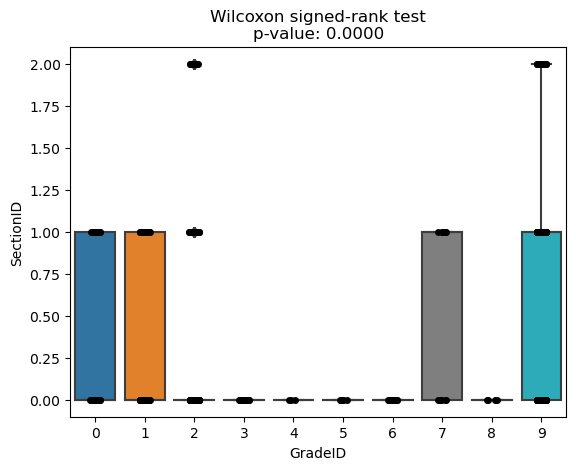

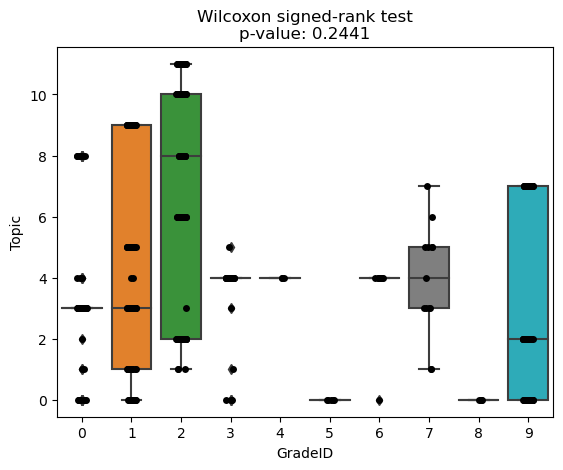

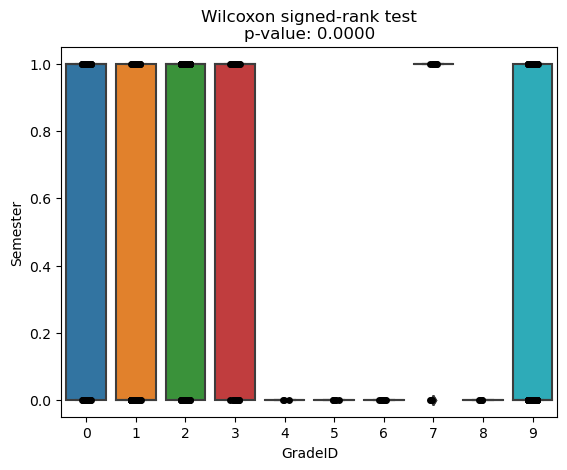

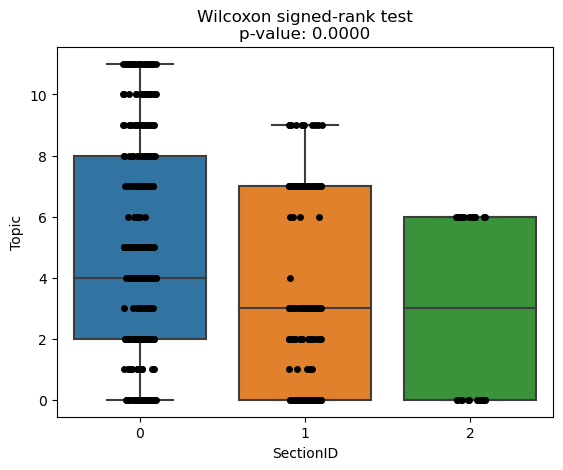

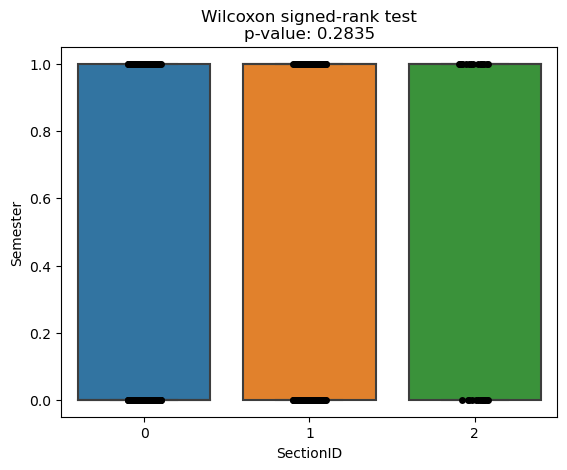

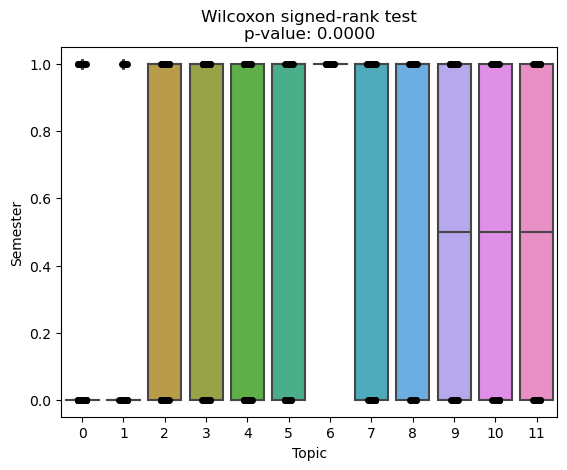

In [5]:
# Define a list of the categorical variables to test
categorical_vars = ["gender", "NationalITy", "PlaceofBirth", "StageID", "GradeID",
                         "SectionID", "Topic", "Semester"]

# Create an empty dictionary to store the test results
test_results = {}
# Loop over all pairs of categorical variables
for i, var1 in enumerate(categorical_vars):
    for j, var2 in enumerate(categorical_vars):
        if i < j:
            # Convert the categorical variables to numerical values
            data[var1], _ = pd.factorize(data[var1])
            data[var2], _ = pd.factorize(data[var2])

            # Perform the Wilcoxon signed-rank test
            statistic, p_value = wilcoxon(data[var1], data[var2], zero_method='pratt')

            # Plot the results
            sns.boxplot(x=var1, y=var2, data=data)
            sns.stripplot(x=var1, y=var2, data=data, jitter=True, color='black')
            plt.title(f"Wilcoxon signed-rank test\np-value: {p_value:.4f}")
            plt.show()